In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('datasimple.csv')
df['time']=pd.to_datetime(df['time'])

In [4]:
df.head(10)

,time,open,high,low,close,KAMA,Volume,Volume MA
0,2020-11-11 02:00:00+02:00,450.34,476.25,449.28,463.09,409.605256,1.205783e+06,8.916167e+05
1,2020-11-12 02:00:00+02:00,463.09,470.00,451.20,462.39,411.539989,9.907766e+05,9.047639e+05
2,2020-11-13 02:00:00+02:00,462.48,478.01,457.12,476.43,415.100806,9.766651e+05,9.326353e+05
3,2020-11-14 02:00:00+02:00,476.42,477.47,452.00,460.89,416.605915,7.352528e+05,9.486186e+05
4,2020-11-15 02:00:00+02:00,460.90,462.89,440.19,448.08,417.443094,6.652176e+05,9.371224e+05
5,2020-11-16 02:00:00+02:00,448.07,466.00,445.45,460.55,419.604131,8.120604e+05,9.400132e+05
6,2020-11-17 02:00:00+02:00,460.51,484.88,459.80,482.15,423.253279,1.151573e+06,9.548281e+05
7,2020-11-18 02:00:00+02:00,482.11,495.31,456.60,478.41,427.469237,1.477696e+06,1.000058e+06
8,2020-11-19 02:00:00+02:00,478.43,480.75,464.86,471.25,430.375610,8.174185e+05,1.002341e+06
9,2020-11-20 02:00:00+02:00,471.26,514.40,470.65,510.12,438.730839,1.516362e+06,1.054787e+06


In [5]:
df['daily_diff']= df['close'] - df['open']

In [6]:
df.head(10)

,time,open,high,low,close,KAMA,Volume,Volume MA,daily_diff
0,2020-11-11 02:00:00+02:00,450.34,476.25,449.28,463.09,409.605256,1.205783e+06,8.916167e+05,12.75
1,2020-11-12 02:00:00+02:00,463.09,470.00,451.20,462.39,411.539989,9.907766e+05,9.047639e+05,-0.70
2,2020-11-13 02:00:00+02:00,462.48,478.01,457.12,476.43,415.100806,9.766651e+05,9.326353e+05,13.95
3,2020-11-14 02:00:00+02:00,476.42,477.47,452.00,460.89,416.605915,7.352528e+05,9.486186e+05,-15.53
4,2020-11-15 02:00:00+02:00,460.90,462.89,440.19,448.08,417.443094,6.652176e+05,9.371224e+05,-12.82
5,2020-11-16 02:00:00+02:00,448.07,466.00,445.45,460.55,419.604131,8.120604e+05,9.400132e+05,12.48
6,2020-11-17 02:00:00+02:00,460.51,484.88,459.80,482.15,423.253279,1.151573e+06,9.548281e+05,21.64
7,2020-11-18 02:00:00+02:00,482.11,495.31,456.60,478.41,427.469237,1.477696e+06,1.000058e+06,-3.70
8,2020-11-19 02:00:00+02:00,478.43,480.75,464.86,471.25,430.375610,8.174185e+05,1.002341e+06,-7.18
9,2020-11-20 02:00:00+02:00,471.26,514.40,470.65,510.12,438.730839,1.516362e+06,1.054787e+06,38.86


In [7]:
#calculate daily return
df['target'] =  np.where((df['daily_diff'] > 0),
                         (((df['close'] / df['open']) - 1) * 100),
                         (((df['open'] - df['close']) / df['open']) * (-100)))

In [8]:
df.head(10)

,time,open,high,low,close,KAMA,Volume,Volume MA,daily_diff,target
0,2020-11-11 02:00:00+02:00,450.34,476.25,449.28,463.09,409.605256,1.205783e+06,8.916167e+05,12.75,2.831194
1,2020-11-12 02:00:00+02:00,463.09,470.00,451.20,462.39,411.539989,9.907766e+05,9.047639e+05,-0.70,-0.151159
2,2020-11-13 02:00:00+02:00,462.48,478.01,457.12,476.43,415.100806,9.766651e+05,9.326353e+05,13.95,3.016347
3,2020-11-14 02:00:00+02:00,476.42,477.47,452.00,460.89,416.605915,7.352528e+05,9.486186e+05,-15.53,-3.259729
4,2020-11-15 02:00:00+02:00,460.90,462.89,440.19,448.08,417.443094,6.652176e+05,9.371224e+05,-12.82,-2.781514
5,2020-11-16 02:00:00+02:00,448.07,466.00,445.45,460.55,419.604131,8.120604e+05,9.400132e+05,12.48,2.785279
6,2020-11-17 02:00:00+02:00,460.51,484.88,459.80,482.15,423.253279,1.151573e+06,9.548281e+05,21.64,4.699138
7,2020-11-18 02:00:00+02:00,482.11,495.31,456.60,478.41,427.469237,1.477696e+06,1.000058e+06,-3.70,-0.767460
8,2020-11-19 02:00:00+02:00,478.43,480.75,464.86,471.25,430.375610,8.174185e+05,1.002341e+06,-7.18,-1.500742
9,2020-11-20 02:00:00+02:00,471.26,514.40,470.65,510.12,438.730839,1.516362e+06,1.054787e+06,38.86,8.245979


In [9]:
df_remove_top_nrows = df.iloc[5:]

In [10]:
df_remove_top_nrows.head()

,time,open,high,low,close,KAMA,Volume,Volume MA,daily_diff,target
5,2020-11-16 02:00:00+02:00,448.07,466.00,445.45,460.55,419.604131,8.120604e+05,9.400132e+05,12.48,2.785279
6,2020-11-17 02:00:00+02:00,460.51,484.88,459.80,482.15,423.253279,1.151573e+06,9.548281e+05,21.64,4.699138
7,2020-11-18 02:00:00+02:00,482.11,495.31,456.60,478.41,427.469237,1.477696e+06,1.000058e+06,-3.70,-0.767460
8,2020-11-19 02:00:00+02:00,478.43,480.75,464.86,471.25,430.375610,8.174185e+05,1.002341e+06,-7.18,-1.500742
9,2020-11-20 02:00:00+02:00,471.26,514.40,470.65,510.12,438.730839,1.516362e+06,1.054787e+06,38.86,8.245979


In [12]:
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, colname = 'var'):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('%s%d(t-%d)' % (colname, j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('%s%d(t)' % (colname,j+1)) for j in range(n_vars)]
		else:
			names += [('%s%d(t+%d)' % (colnamej,+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
col_value_list = df['open'].tolist()
df_open = series_to_supervised(col_value_list, n_in = 5, colname = 'open')
print(df_open.head())

   open1(t-5)  open1(t-4)  open1(t-3)  open1(t-2)  open1(t-1)  open1(t)
5      450.34      463.09      462.48      476.42      460.90    448.07
6      463.09      462.48      476.42      460.90      448.07    460.51
7      462.48      476.42      460.90      448.07      460.51    482.11
8      476.42      460.90      448.07      460.51      482.11    478.43
9      460.90      448.07      460.51      482.11      478.43    471.26


In [15]:
col_value_list = df['close'].tolist()
df_close = series_to_supervised(col_value_list, n_in = 5, colname = 'close')
print(df_close.head())

   close1(t-5)  close1(t-4)  close1(t-3)  close1(t-2)  close1(t-1)  close1(t)
5       463.09       462.39       476.43       460.89       448.08     460.55
6       462.39       476.43       460.89       448.08       460.55     482.15
7       476.43       460.89       448.08       460.55       482.15     478.41
8       460.89       448.08       460.55       482.15       478.41     471.25
9       448.08       460.55       482.15       478.41       471.25     510.12


In [16]:
col_value_list = df['low'].tolist()
df_low = series_to_supervised(col_value_list, n_in = 5, colname = 'low')
print(df_low.head())

   low1(t-5)  low1(t-4)  low1(t-3)  low1(t-2)  low1(t-1)  low1(t)
5     449.28     451.20     457.12     452.00     440.19   445.45
6     451.20     457.12     452.00     440.19     445.45   459.80
7     457.12     452.00     440.19     445.45     459.80   456.60
8     452.00     440.19     445.45     459.80     456.60   464.86
9     440.19     445.45     459.80     456.60     464.86   470.65


In [17]:
col_value_list = df['high'].tolist()
df_high = series_to_supervised(col_value_list, n_in = 5, colname = 'high')
print(df_high.head())

   high1(t-5)  high1(t-4)  high1(t-3)  high1(t-2)  high1(t-1)  high1(t)
5      476.25      470.00      478.01      477.47      462.89    466.00
6      470.00      478.01      477.47      462.89      466.00    484.88
7      478.01      477.47      462.89      466.00      484.88    495.31
8      477.47      462.89      466.00      484.88      495.31    480.75
9      462.89      466.00      484.88      495.31      480.75    514.40


In [18]:
col_value_list = df['KAMA'].tolist()
df_kama = series_to_supervised(col_value_list, n_in = 5, colname = 'KAMA')
print(df_kama.head())

   KAMA1(t-5)  KAMA1(t-4)  KAMA1(t-3)  KAMA1(t-2)  KAMA1(t-1)    KAMA1(t)
5  409.605256  411.539989  415.100806  416.605915  417.443094  419.604131
6  411.539989  415.100806  416.605915  417.443094  419.604131  423.253279
7  415.100806  416.605915  417.443094  419.604131  423.253279  427.469237
8  416.605915  417.443094  419.604131  423.253279  427.469237  430.375610
9  417.443094  419.604131  423.253279  427.469237  430.375610  438.730839


In [19]:
#col_one_list = df['open'].tolist()
#data = series_to_supervised(col_one_list, n_in = 5, colname = 'open')
#print(data.head())

In [20]:
pdList = [df_open, df_close, df_low, df_high, df_kama, df_remove_top_nrows]  # List of your dataframes
new_df = pd.concat(pdList, axis=1)

In [21]:
new_df.head()

,open1(t-5),open1(t-4),open1(t-3),open1(t-2),open1(t-1),open1(t),close1(t-5),close1(t-4),close1(t-3),close1(t-2),close1(t-1),close1(t),low1(t-5),low1(t-4),low1(t-3),low1(t-2),low1(t-1),low1(t),high1(t-5),high1(t-4),high1(t-3),high1(t-2),high1(t-1),high1(t),KAMA1(t-5),KAMA1(t-4),KAMA1(t-3),KAMA1(t-2),KAMA1(t-1),KAMA1(t),time,open,high,low,close,KAMA,Volume,Volume MA,daily_diff,target
5,450.34,463.09,462.48,476.42,460.90,448.07,463.09,462.39,476.43,460.89,448.08,460.55,449.28,451.20,457.12,452.00,440.19,445.45,476.25,470.00,478.01,477.47,462.89,466.00,409.605256,411.539989,415.100806,416.605915,417.443094,419.604131,2020-11-16 02:00:00+02:00,448.07,466.00,445.45,460.55,419.604131,8.120604e+05,9.400132e+05,12.48,2.785279
6,463.09,462.48,476.42,460.90,448.07,460.51,462.39,476.43,460.89,448.08,460.55,482.15,451.20,457.12,452.00,440.19,445.45,459.80,470.00,478.01,477.47,462.89,466.00,484.88,411.539989,415.100806,416.605915,417.443094,419.604131,423.253279,2020-11-17 02:00:00+02:00,460.51,484.88,459.80,482.15,423.253279,1.151573e+06,9.548281e+05,21.64,4.699138
7,462.48,476.42,460.90,448.07,460.51,482.11,476.43,460.89,448.08,460.55,482.15,478.41,457.12,452.00,440.19,445.45,459.80,456.60,478.01,477.47,462.89,466.00,484.88,495.31,415.100806,416.605915,417.443094,419.604131,423.253279,427.469237,2020-11-18 02:00:00+02:00,482.11,495.31,456.60,478.41,427.469237,1.477696e+06,1.000058e+06,-3.70,-0.767460
8,476.42,460.90,448.07,460.51,482.11,478.43,460.89,448.08,460.55,482.15,478.41,471.25,452.00,440.19,445.45,459.80,456.60,464.86,477.47,462.89,466.00,484.88,495.31,480.75,416.605915,417.443094,419.604131,423.253279,427.469237,430.375610,2020-11-19 02:00:00+02:00,478.43,480.75,464.86,471.25,430.375610,8.174185e+05,1.002341e+06,-7.18,-1.500742
9,460.90,448.07,460.51,482.11,478.43,471.26,448.08,460.55,482.15,478.41,471.25,510.12,440.19,445.45,459.80,456.60,464.86,470.65,462.89,466.00,484.88,495.31,480.75,514.40,417.443094,419.604131,423.253279,427.469237,430.375610,438.730839,2020-11-20 02:00:00+02:00,471.26,514.40,470.65,510.12,438.730839,1.516362e+06,1.054787e+06,38.86,8.245979


In [22]:
new_df.shape

(387, 40)

In [23]:
columns = ['open1(t)', 'close1(t)', 'low1(t)','high1(t)', 'KAMA1(t)', 'time', 'open', 'high', 'low', 'close', 'KAMA', 'Volume', 'Volume MA', 'daily_diff']
new_df.drop(columns, inplace=True, axis=1)

In [24]:
new_df.head()

,open1(t-5),open1(t-4),open1(t-3),open1(t-2),open1(t-1),close1(t-5),close1(t-4),close1(t-3),close1(t-2),close1(t-1),low1(t-5),low1(t-4),low1(t-3),low1(t-2),low1(t-1),high1(t-5),high1(t-4),high1(t-3),high1(t-2),high1(t-1),KAMA1(t-5),KAMA1(t-4),KAMA1(t-3),KAMA1(t-2),KAMA1(t-1),target
5,450.34,463.09,462.48,476.42,460.90,463.09,462.39,476.43,460.89,448.08,449.28,451.20,457.12,452.00,440.19,476.25,470.00,478.01,477.47,462.89,409.605256,411.539989,415.100806,416.605915,417.443094,2.785279
6,463.09,462.48,476.42,460.90,448.07,462.39,476.43,460.89,448.08,460.55,451.20,457.12,452.00,440.19,445.45,470.00,478.01,477.47,462.89,466.00,411.539989,415.100806,416.605915,417.443094,419.604131,4.699138
7,462.48,476.42,460.90,448.07,460.51,476.43,460.89,448.08,460.55,482.15,457.12,452.00,440.19,445.45,459.80,478.01,477.47,462.89,466.00,484.88,415.100806,416.605915,417.443094,419.604131,423.253279,-0.767460
8,476.42,460.90,448.07,460.51,482.11,460.89,448.08,460.55,482.15,478.41,452.00,440.19,445.45,459.80,456.60,477.47,462.89,466.00,484.88,495.31,416.605915,417.443094,419.604131,423.253279,427.469237,-1.500742
9,460.90,448.07,460.51,482.11,478.43,448.08,460.55,482.15,478.41,471.25,440.19,445.45,459.80,456.60,464.86,462.89,466.00,484.88,495.31,480.75,417.443094,419.604131,423.253279,427.469237,430.375610,8.245979


In [90]:
!pip install pycaret

     |████████████████████████████████| 301 kB 23.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 2.0 MB 6.0 MB/s 
     |████████████████████████████████| 114 kB 51.4 MB/s 
     |████████████████████████████████| 6.8 MB 33.7 MB/s 
     |████████████████████████████████| 1.3 MB 45.9 MB/s 
     |████████████████████████████████| 1.7 MB 62.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.5 MB 38.9 MB/s 
     |████████████████████████████████| 261 kB 56.1 MB/s 
     |████████████████████████████████| 167 kB 55.0 MB/s 
     |████████████████████████████████| 102 kB 9.8 MB/s 
     |████████████████████████████████| 303 kB 53.5 MB/s 
     |████████████████████████████████| 636 kB 52.6 MB/s 
     |██████████████████

In [36]:
new_df['target_flag'] = np.where(new_df['target'] > 0, 'Buy', 'Sell')

In [37]:
new_df['target_flag'].value_counts()

Buy     221
Sell    166
Name: target_flag, dtype: int64

In [39]:
new_df.head()

,open1(t-5),open1(t-4),open1(t-3),open1(t-2),open1(t-1),close1(t-5),close1(t-4),close1(t-3),close1(t-2),close1(t-1),...,high1(t-3),high1(t-2),high1(t-1),KAMA1(t-5),KAMA1(t-4),KAMA1(t-3),KAMA1(t-2),KAMA1(t-1),target,target_flag
5,450.34,463.09,462.48,476.42,460.90,463.09,462.39,476.43,460.89,448.08,...,478.01,477.47,462.89,409.605256,411.539989,415.100806,416.605915,417.443094,2.785279,Buy
6,463.09,462.48,476.42,460.90,448.07,462.39,476.43,460.89,448.08,460.55,...,477.47,462.89,466.00,411.539989,415.100806,416.605915,417.443094,419.604131,4.699138,Buy
7,462.48,476.42,460.90,448.07,460.51,476.43,460.89,448.08,460.55,482.15,...,462.89,466.00,484.88,415.100806,416.605915,417.443094,419.604131,423.253279,-0.767460,Sell
8,476.42,460.90,448.07,460.51,482.11,460.89,448.08,460.55,482.15,478.41,...,466.00,484.88,495.31,416.605915,417.443094,419.604131,423.253279,427.469237,-1.500742,Sell
9,460.90,448.07,460.51,482.11,478.43,448.08,460.55,482.15,478.41,471.25,...,484.88,495.31,480.75,417.443094,419.604131,423.253279,427.469237,430.375610,8.245979,Buy


In [40]:
from pycaret.classification import *
s = setup(new_df,
          target = 'target_flag',
          ignore_features = ['target'],
          fold_strategy = 'timeseries',
          feature_ratio =True,
          normalize=True,
          remove_outliers = True,
          outliers_threshold = 0.01)

,Description,Value
0,session_id,3599
1,Target,target_flag
2,Target Type,Binary
3,Label Encoded,"Buy: 0, Sell: 1"
4,Original Data,"(387, 27)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best = compare_models( n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5667,0.5339,0.1302,0.4900,0.1890,0.0410,0.0755,0.020
dummy,Dummy Classifier,0.5625,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.013
ridge,Ridge Classifier,0.5583,0.0000,0.0863,0.4500,0.1357,0.0196,0.0474,0.022
nb,Naive Bayes,0.5542,0.5154,0.0125,0.0333,0.0182,-0.0083,-0.0192,0.024
lr,Logistic Regression,0.5500,0.5438,0.0687,0.3500,0.1042,0.0012,0.0262,0.032
qda,Quadratic Discriminant Analysis,0.5458,0.4953,0.0000,0.0000,0.0000,-0.0327,-0.0617,0.117
knn,K Neighbors Classifier,0.5333,0.5093,0.2881,0.4523,0.3074,0.0238,0.0351,0.121
svm,SVM - Linear Kernel,0.5167,0.0000,0.3064,0.3268,0.2502,-0.0124,-0.0370,0.028
lightgbm,Light Gradient Boosting Machine,0.5167,0.4854,0.2367,0.3286,0.2645,-0.0169,-0.0227,0.028
ada,Ada Boost Classifier,0.5125,0.4684,0.3509,0.4313,0.3688,-0.0157,-0.0140,0.134


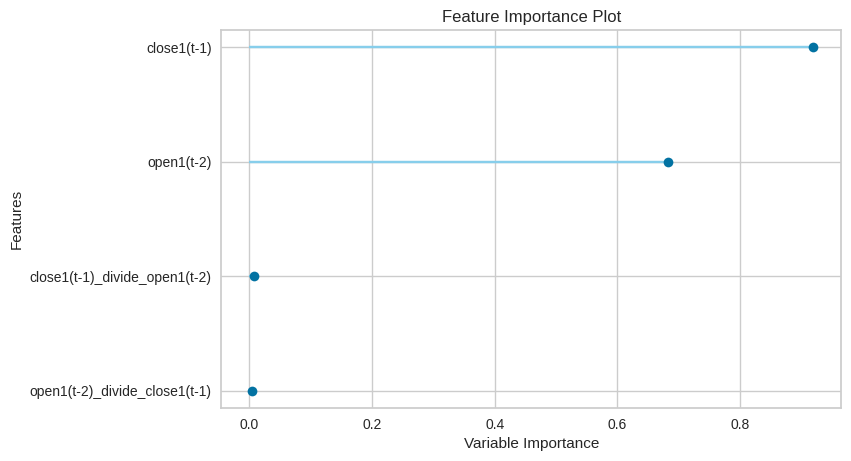

In [43]:
plot_model(best[0], plot = 'feature')

In [44]:
predict_model(best[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6154,0.5597,0.2549,0.65,0.3662,0.1599,0.1961


,open1(t-2),close1(t-1),open1(t-2)_divide_close1(t-1),close1(t-1)_divide_open1(t-2),target_flag,Label,Score
0,-1.517886,-1.521003,0.997951,1.002053,Buy,Buy,0.6680
1,1.235028,1.316767,0.937925,1.066184,Sell,Sell,0.5082
2,-1.509442,-1.477059,1.021924,0.978546,Buy,Buy,0.6604
3,-1.466994,-1.498108,0.979231,1.021209,Buy,Buy,0.6710
4,0.158321,0.107237,1.476369,0.677337,Buy,Buy,0.5867
...,...,...,...,...,...,...,...
112,-0.414374,-0.332472,1.246344,0.802347,Sell,Buy,0.5895
113,1.339588,0.890583,1.504171,0.664818,Buy,Buy,0.6073
114,0.613592,0.729695,0.840888,1.189219,Sell,Buy,0.5204
115,1.945297,1.899402,1.024163,0.976407,Sell,Sell,0.5207


In [117]:
from pycaret.internal.tabular import X_train
get_config(X_train)

TypeError: ignored

In [118]:
import numpy as np
Xtest = get_config('X_test')
ytest = get_config('y_test')

In [119]:
Xtest

,open1(t-5),open1(t-4),open1(t-3),open1(t-2),open1(t-1),open1(t),Volume1(t-5),Volume1(t-4),Volume1(t-3),Volume1(t-2),...,Volume1(t-3)_divide_Volume1(t-2),Volume1(t-5)_divide_Volume1(t),Volume1(t-4)_multiply_open1(t),Volume1(t-3)_divide_Volume1(t-4),Volume MA_divide_Volume1(t-5),KAMA1(t-1)_multiply_Volume1(t),Volume1(t)_divide_Volume1(t-2),Volume1(t-4)_multiply_open1(t-3),Volume1(t-5)_divide_KAMA1(t-1),Volume MA_divide_KAMA1(t-1)
137,-0.554570,-0.585917,-0.473626,-0.466768,-0.398061,-0.368340,-1.030362,-0.508272,-0.653704,-0.331377,...,1.972688,6.080881,0.187217,1.286129,0.738384,0.100680,0.511330,0.240731,1.734081,1.280418
374,1.698972,1.801391,1.668848,1.509269,1.748290,1.660449,-1.001962,-1.032654,-0.742246,-0.710308,...,1.044963,1.247604,-1.714669,0.718775,1.257643,-1.377405,1.130648,-1.723342,-0.584203,-0.734719
25,-1.528254,-1.536956,-1.548389,-1.597811,-1.591969,-1.610139,-0.598798,-0.763021,-0.239315,0.056884,...,-4.207072,2.052364,1.228571,0.313641,-0.926584,0.472773,-5.129047,1.181454,0.369534,-0.342404
121,-0.455726,-0.516734,-0.381023,-0.460002,-0.509259,-0.512026,-0.144318,-0.033272,-0.532128,0.100544,...,-5.292497,0.309177,0.017036,15.993401,-0.146108,0.289392,-4.642556,0.012677,0.232780,-0.034011
221,-0.159388,-0.098532,-0.413543,-0.432559,-0.354976,-0.349410,-0.358195,1.166403,1.327644,-0.065058,...,-20.406986,2.396237,-0.407552,1.138238,0.410697,-0.042699,2.297663,-0.482358,-1.253980,-0.515006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.802130,0.918423,0.814109,0.935684,1.104495,1.041664,-0.928320,-0.508048,-0.997045,-0.825615,...,1.207639,1.057949,-0.529215,1.962502,0.971055,-0.790769,1.062809,-0.413606,-1.030104,-1.000288
69,-0.950781,-0.867838,-0.859544,-1.107680,-1.007143,-1.015731,2.253926,2.171311,2.409114,1.645023,...,1.464486,2.553576,-2.205469,1.109520,1.029060,-0.911373,0.536561,-1.866339,-2.182903,-2.246337
5,-1.658070,-1.660552,-1.644123,-1.665111,-1.682379,-1.653208,-0.242175,0.350894,0.944843,-0.222093,...,-4.254259,-0.256879,-0.580101,2.692670,-1.443492,-1.623080,-4.244874,-0.576914,0.140666,-0.203051
300,1.377745,0.945178,1.001718,0.927386,0.745569,0.776508,0.424015,-0.281672,-0.548679,-0.508238,...,1.079571,-0.492074,-0.218720,1.947937,-2.163270,-0.769588,1.695444,-0.282156,0.474760,-1.027033


In [21]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [22]:
raw = DataFrame()
raw['ob1'] = col_one_list = df['open'].tolist()
raw['ob2'] = col_one_list = df['Volume'].tolist()
values = raw.values
data = series_to_supervised(values, 1, 2)
print(data.head())

   var1(t-1)     var2(t-1)  var1(t)       var2(t)  var1(t+1)     var2(t+1)
1     450.34  1.205783e+06   463.09  990776.62912     462.48  9.766651e+05
2     463.09  9.907766e+05   462.48  976665.09752     476.42  7.352528e+05
3     462.48  9.766651e+05   476.42  735252.78540     460.90  6.652176e+05
4     476.42  7.352528e+05   460.90  665217.56671     448.07  8.120604e+05
5     460.90  6.652176e+05   448.07  812060.44638     460.51  1.151573e+06


In [ ]:
values

array([[ 450.34      ,  409.60525584],
       [ 463.09      ,  411.53998872],
       [ 462.48      ,  415.10080623],
       [ 476.42      ,  416.60591491],
       [ 460.9       ,  417.44309422],
       [ 448.07      ,  419.60413098],
       [ 460.51      ,  423.253279  ],
       [ 482.11      ,  427.46923694],
       [ 478.43      ,  430.3756104 ],
       [ 471.26      ,  438.73083889],
       [ 510.12      ,  453.68987205],
       [ 552.42      ,  467.51280005],
       [ 560.03      ,  494.12851918],
       [ 608.58      ,  513.83905486],
       [ 604.98      ,  519.69873752],
       [ 569.38      ,  519.70461174],
       [ 519.83      ,  519.67743328],
       [ 518.59      ,  520.58562351],
       [ 537.5       ,  523.99018938],
       [ 576.32      ,  532.57901908],
       [ 616.65      ,  535.66212859],
       [ 585.26      ,  539.21466748],
       [ 596.88      ,  544.35579941],
       [ 615.84      ,  545.03111728],
       [ 567.24      ,  547.55417949],
       [ 596.82      ,  5